Credit card fraud detection

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv("creditcard.csv")

In [3]:
credit_card_data.shape

(284807, 31)

In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#dropping old amount and time columns
credit_card_data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [7]:
credit_card_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [8]:
credit_card_data.isnull().sum()
#Inference - No Null values

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [9]:
credit_card_data['Class'].value_counts()
#inference imbalanced dataset

0    284315
1       492
Name: Class, dtype: int64

In [10]:
import seaborn as sns
import matplotlib as plt

[Text(0, 0, '284315'), Text(0, 0, '492')]

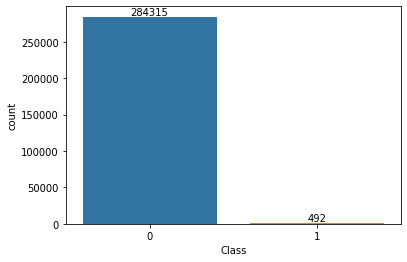

In [11]:
ax = sns.countplot(x=credit_card_data['Class'],
                   order=credit_card_data['Class'].value_counts(ascending=False).index)

abs_values = credit_card_data['Class'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [12]:
cases = len(credit_card_data)
nonfraud_count = len(credit_card_data[credit_card_data.Class == 0])
fraud_count = len(credit_card_data[credit_card_data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Number of Non-fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))
print('--------------------------------------------')

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [13]:
# as the Dataset is imbalanced , we use SMOTE to balanced balanced the dataset 

In [14]:
from imblearn.over_sampling import SMOTE 

In [15]:
sm = SMOTE(random_state=42)
X = credit_card_data.drop('Class', axis = 1)
y = credit_card_data['Class']
print(X.shape, y.shape)
X_sm, y_sm = sm.fit_resample(X, y)
print ("Dataset after applying SMOTE")
print (X_sm.shape, y_sm.shape)

(284807, 28) (284807,)
Dataset after applying SMOTE
(568630, 28) (568630,)


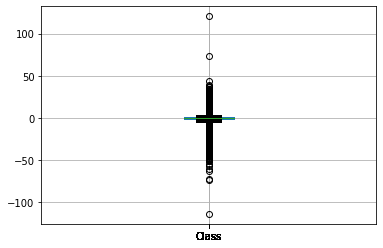

In [16]:
for column in credit_card_data:
    credit_card_data.boxplot([column])

#checking for Outliers

In [17]:
credit_card_data.drop_duplicates(inplace=True)

In [18]:
credit_card_data.info()
#data reduced after removing duplicates.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

In [19]:
X = credit_card_data.drop('Class', axis= 1).values
y = credit_card_data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[ 1.90275196  0.64123099 -0.34789577  4.138767    0.41780812  0.01763508
   0.09547581 -0.22083213  0.50683495  0.97377297 -0.33636602 -2.09948407
   2.45737573  1.24586441 -2.32435068  0.31363938  0.22877789 -0.4590031
  -1.62694805 -0.29743722 -0.05712629  0.31851204  0.0880977  -0.0521382
   0.12592093  0.0584167  -0.04407223 -0.05531737]]
X_test samples :  [[-2.999973    0.46978504 -1.83078717 -1.0430591   2.04108849 -1.41933883
  -0.40575457 -3.11720859 -0.50414651 -1.06997092  0.38800479  0.7282632
  -0.48575366 -0.15097222 -1.93781879  0.77529483  0.37675703  0.38180351
  -0.88867035 -1.6535239   3.02623988 -0.77469344 -1.13515534 -0.36920796
   0.10781531  0.60853373  0.62792964 -0.54242886]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_sm.values, y_sm.values, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[-0.61908314  0.27561301  3.1335028   3.1100085  -0.34614592  0.92451086
  -0.10231961  0.27072749  0.16661295  0.25219639 -0.88990484  0.24046682
  -0.59675943 -1.0559703  -1.66636349 -1.22504838  1.02247977 -1.04756345
   0.37137867  0.13717894 -0.14324464  0.075457    0.11237298  0.61026081
  -0.56257051 -0.01982485  0.0386327  -0.05386735]]
X_test samples :  [[-2.17844221e+01  1.28889380e+01 -2.40174818e+01  6.19894757e+00
  -1.64004659e+01 -4.45421923e+00 -1.64764641e+01  1.44729004e+01
  -3.90086327e+00 -8.66113653e+00  5.39312559e+00 -7.59314214e+00
   4.50308353e-01 -7.86528263e+00 -2.16326609e-02 -6.59644927e+00
  -1.30258796e+01 -4.88723993e+00  1.11061583e+00  1.61057047e+00
   1.76166546e+00 -1.57062141e+00 -9.43995736e-01  1.33908298e-01
   1.49930595e+00 -2.22752039e-01  1.53113127e+00  4.54857782e-01]]
y_train samples :  [0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1]
y_test samples :  [1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1]


In [21]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm


from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [22]:
#1. Using Decision Tree 
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)


In [ ]:
#n =5
#knn = KNeighborsClassifier(n_neighbors = n)
#knn.fit(X_train, y_train)
#knn_yhat = knn.predict(X_test)

#KNN became very slow, So didnt let the code execute it ( as the number of datapoints increases as the model needs to store all the data points.) 
#KNN is not memory efficient.
#It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

In [ ]:
#In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. 
#SVM is not very efficient with large number of datapoints beacuse it was taking a  lot of computational power and resources to make the transformation.
#Hence, because of the unavailablity of the required resources and time SVM was removed.
# 4. SVM 

#svm = SVC()
#svm.fit(X_train, y_train)
#svm_yhat = svm.predict(X_test)

In [23]:
# 2. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)



# 3. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

Metric selection Criteria:
As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent,  
Accuracy is not a good measure for evaluating the model. 
Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.
we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.
F1 score indicates harmoic mean of precision and recall.

In [25]:
print('F1 SCORE')
print('------------------------------------------------------------------------')
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('------------------------------------------------------------------------')
#print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
#print('------------------------------------------------------------------------')
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('------------------------------------------------------------------------')
#print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('------------------------------------------------------------------------')

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.9365686355424725
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.9434300294974575
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.9352255241838304
------------------------------------------------------------------------
